sum cool imports

In [27]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

we need to know how to read the file

In [28]:
def readFromFile(filename):
    f = open(filename, "r")
    fields = f.readline().split(',')
    # MonthlyCharges = fields[18]
    col1 = 2
    col2 = 18
    values = list()
    for line in f:
        values.append([line[col1],line[col2]])
    print(len(values))

In [34]:
filename = "D:\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
values = pd.read_csv(filename)
array = values["tenure"]

In [45]:
array = (np.array(array)).reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(array)
print(scaler.mean_)
print(scaler.scale_)

[32.37114866]
[24.55773742]


In [46]:
array_scaled = scaler.transform(array)
print(array_scaled)

[[-1.27744458]
 [ 0.06632742]
 [-1.23672422]
 ...
 [-0.87024095]
 [-1.15528349]
 [ 1.36937906]]


In [47]:
print("mean:", array_scaled.mean(axis=0),", std:",  array_scaled.std(axis=0))

mean: [-2.42127299e-17] , std: [1.]


In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
array_minmax = min_max_scaler.fit_transform(array)
print(array_minmax)

[[0.01388889]
 [0.47222222]
 [0.02777778]
 ...
 [0.15277778]
 [0.05555556]
 [0.91666667]]


In [50]:
array_minmax = min_max_scaler.transform(array)
print(array_minmax)

[[0.01388889]
 [0.47222222]
 [0.02777778]
 ...
 [0.15277778]
 [0.05555556]
 [0.91666667]]


In [52]:
print(min_max_scaler.scale_)
print(min_max_scaler.min_)

[0.01388889]
[0.]


In [53]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

filename = "D:\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
values = pd.read_csv(filename)
array = values["tenure"]
array = (np.array(array)).reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(array)
array_scaled = scaler.transform(array)

print("mean:", array_scaled.mean(axis=0),", std:",  array_scaled.std(axis=0))

mean: [-2.42127299e-17] , std: [1.]


The best-fit line is 2.483673 * x + 9.775803.


Text(0, 0.5, '$scores$')

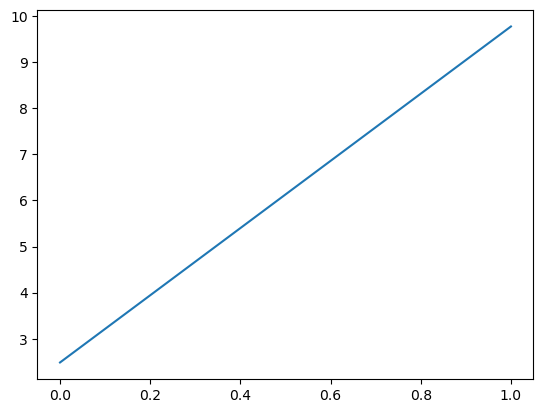

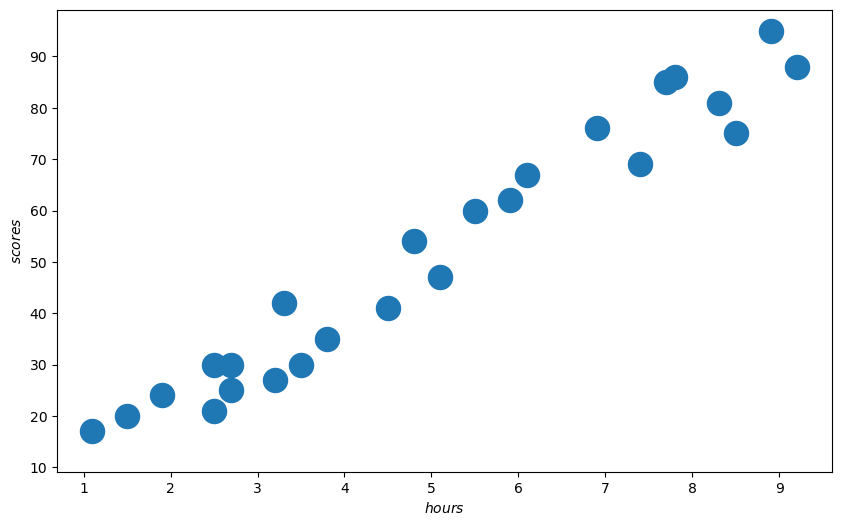

In [85]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

filename = "D:\\Downloads\\archive\\score.csv"
values = pd.read_csv(filename)
hours = values["Hours"]
scores = values["Scores"]
nr = hours.shape[0]
hours = (np.array(hours)).reshape(nr,1)
scores = (np.array(scores)).reshape(nr,1)

def nice_scatterplot(x, y, title):
    # font size
    f_size = 18
    
    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)
    
    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)
    
    # adjust size of axis label
    ax.set_xlabel(r'$hours$', fontsize = f_size)
    ax.set_ylabel(r'$scores$', fontsize = f_size)
    
    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this 
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$My points$')
    #ax.scatter(x, y, label='$My points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);
    
    return ax

# nice_scatterplot(hours, scores, 'A nice plot')

# x_bar = np.mean(hours)
# y_bar = np.mean(scores)

# # build the two terms
# numerator = np.sum( (hours - x_bar)*(scores - y_bar) )
# denominator = np.sum((hours - x_bar)**2)

# # print(numerator.shape, denominator.shape) #check shapes

# #slope beta1
# a = numerator/denominator

# #intercept beta0
# b = y_bar - a * x_bar

# print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(b, a))
# print(f'The best fit is {b}')

def simple_linear_regression_fit(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x: a (num observations by 1) array holding the values of the predictor variable
    y: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x.shape) < 2:
        print("Reshaping features array.")
        x = x.reshape(x.shape[0], 1)

    if len(y.shape) < 2:
        print("Reshaping observations array.")
        y = y.reshape(y.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y)
    x_bar = np.mean(x)

    # build the two terms
    numerator = np.sum( (x - x_bar)*(y - y_bar) )
    denominator = np.sum((x - x_bar)**2)
    
    #slope a
    a = numerator/denominator

    #intercept b
    b = y_bar - a*x_bar

    return np.array([b,a])

coeficients = simple_linear_regression_fit(hours, scores)
a = coeficients[1]
b = coeficients[0]

print("The best-fit line is {1:8.6f} * x + {0:8.6f}.".format(a, b))
plt.plot(simple_linear_regression_fit(hours, scores))

# %load solutions/best_fit_scatterplot.py
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x = hours.T

best_fit = b + a * x

ax_scat.scatter(x, scores, s=300, label='Training Data')
ax_scat.plot(x, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$hours$')
ax_scat.set_ylabel(r'$scores$')


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.94
9.941678339488094 * x + 1.9322042531516601 = y


Text(0, 0.5, '$scores$')

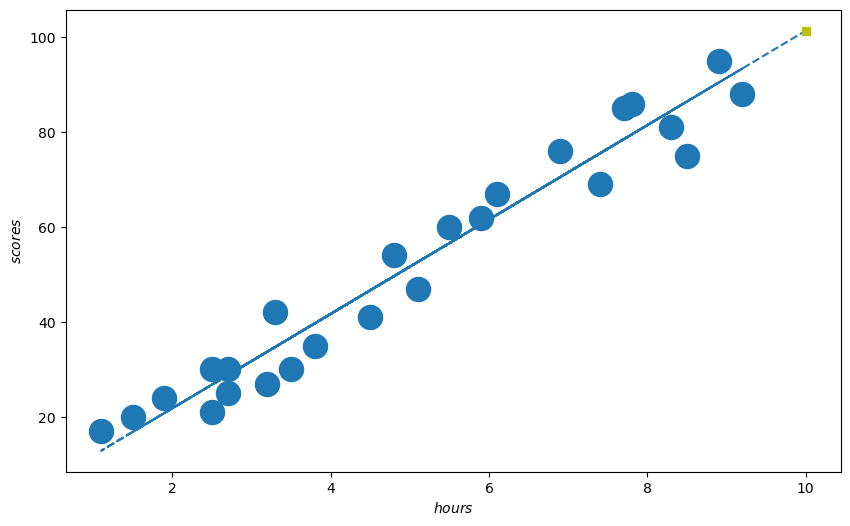

In [92]:
#we load the dataset (be sure that this file is in the same folder with the j. notebook)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("D:\\Downloads\\archive\\score.csv")
print(df.head())
X = np.array(df['Hours'])
y = np.array(df['Scores'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# we perform the regression
lr = LinearRegression().fit(X_train, y_train)


print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

a = lr.coef_[0] # we ahve one feature with index 0

b = lr.intercept_ # a scalar
 
print(a, "* x +", b, "= y")
lr.predict([[10]])
a * 10 + b

pred = lr.predict([[10]])
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))


x = X.T

best_fit = b + a * (np.append(x, [10]))

ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[10]), best_fit, ls='--', label='Best Fit Line')

ax_scat.plot([10],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$hours$')
ax_scat.set_ylabel(r'$scores$')


In [93]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.94
Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.94


In [66]:
x_train.shape
array = (np.array(array)).reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(array)
array_scaled = scaler.transform(array)

print("mean:", array_scaled.mean(axis=0),", std:",  array_scaled.std(axis=0))

NameError: name 'x_train' is not defined

In [68]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

filename = "D:\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
values = pd.read_csv(filename)
array = values["tenure"]
array = (np.array(array)).reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(array)
array_scaled = scaler.transform(array)

print("mean:", array_scaled.mean(axis=0),", std:",  array_scaled.std(axis=0))

mean: [-2.42127299e-17] , std: [1.]
